## Intensity

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display

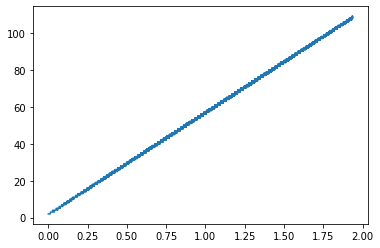

In [43]:
sr = 8000
t = np.arange(sr*2)/sr
y = np.cos(2*np.pi*220*t**2)
zcs = np.abs(np.sign(y[1::]) - np.sign(y[0:-1]))/2

# Numerical integraion: cumusum(a, b) = cumsum(0, b) - cumsum(0, a)
# b - a = 100
# Ex) zcs_int[0] = cumsum(0, 100) - cumsum(0, 0)
# Ex) zcs_int[50] = cumsum(0, 150) - cumsum(0, 50)

win = 500
zcs_int = np.cumsum(zcs)[win::] - np.cumsum(zcs)[0:-win]
plt.plot(t[0:len(zcs_int)], zcs_int)

In [44]:
y, sr = librosa.load("malecountdown.mp3", sr=44100)

/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


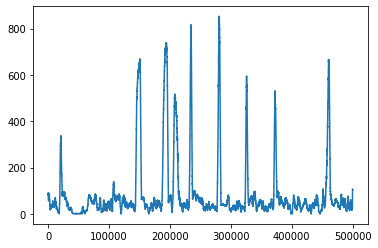

In [56]:
y, sr = librosa.load("malecountdown.mp3", sr=44100)
zcs = np.abs(np.sign(y[1::]) - np.sign(y[0:-1]))/2
win = 2000
zcs_int = np.cumsum(zcs)[win::] - np.cumsum(zcs)[0:-win]
plt.plot(zcs_int)
z = y[0:len(zcs_int)]
z[zcs_int < 100] = 0
ipd.Audio(z, rate=sr)

Text(0.5, 1.0, 'Equal Loudness Contour')

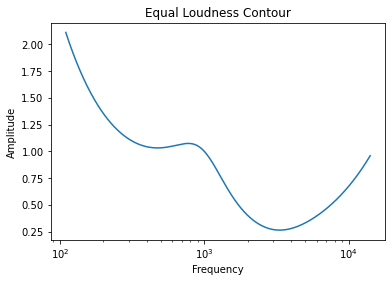

In [16]:
def get_contour(freqs):
    """
    Code adapted from
    https://www.audiolabs-erlangen.de/resources/MIR/FMP/C1/C1S3_Dynamics.html
    Parameters
    ----------
    freqs: ndarray(N)
        Frequencies at which to sample the equal loudness contour
    
    Returns
    -------
    ndarray(N): Amplitudes at corresponding frequencies that are equal in loudness
    """
    freq = 1000
    h_freq = ((1037918.48 - freq**2)**2 + 1080768.16 * freq**2) / ((9837328 - freq**2)**2 + 11723776 * freq**2)
    n_freq = (freq / (6.8966888496476 * 10**(-5))) * np.sqrt(h_freq / ((freq**2 + 79919.29) * (freq**2 + 1345600)))
    h_freq_range = ((1037918.48 - freqs**2)**2 + 1080768.16 * freqs**2) / ((9837328 - freqs**2)**2
                                                                                     + 11723776 * freqs**2)
    n_freq_range = (freqs / (6.8966888496476 * 10**(-5))) * np.sqrt(h_freq_range / ((freqs**2 + 79919.29) *
                                                                         (freqs**2 + 1345600)))
    equal_loudness_contour = np.abs(n_freq / n_freq_range)
    return equal_loudness_contour

sr = 44100
t = np.arange(sr*3)/sr
freqs = 110*2**(np.linspace(0, 7, sr*3))
amplitudes = get_contour(freqs)
plt.plot(freqs, amplitudes)
plt.xscale("log")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Equal Loudness Contour")

In [13]:
f = np.cumsum(freqs)*(t[1]-t[0])
y = 0.1*np.cos(2*np.pi*f)
y[0] = 1 # To keep amplitude down
ipd.Audio(y, rate=sr)

In [14]:
f = np.cumsum(freqs)*(t[1]-t[0])
y = 0.1*np.cos(2*np.pi*f)
y[0] = 1 # To keep amplitude down
y *= amplitudes
ipd.Audio(y, rate=sr)